
# Project: Investigate TMDB Dataset 
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Question(s) for Analysis
1-what year has the highest release of movies?

2- what are the top 5 highest rated movies?

3-Which Genre Has The Highest Release Of Movies?

4-IS there a relationship between revenue and ratings?

5- What are the top 10 high revenue Movies?

6- What duration length of movies are most likable by people?


In [1]:
# importing the libraries used for the analysis
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
# Stop floats from displaying as scientific notation
pd.options.display.float_format = '{:20,.2f}'.format



In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)



## Data Wrangling

### Loading the data

In [3]:
# Loading the TMDB dataset and exploring the first columns
df_tmdb=pd.read_csv("Database_TMDb_movie_data/tmdb-movies.csv")

df_tmdb.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,"137,999,939.28","1,392,445,892.52"
1,76341,tt1392190,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.10,2015,"137,999,939.28","348,161,292.49"
2,262500,tt2908446,13.11,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.30,2015,"101,199,955.47","271,619,025.41"
3,140607,tt2488496,11.17,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.50,2015,"183,999,919.04","1,902,723,129.80"
4,168259,tt2820852,9.34,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.30,2015,"174,799,923.09","1,385,748,801.47"


### checking data types for the columns

In [4]:
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

### From above , we can say that their is  missing values in the data set and having total  10866 rows and 21 columns

In [5]:
df_tmdb.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,"10,866.00","10,866.00","10,866.00","10,866.00","10,866.00","10,866.00","10,866.00","10,866.00","10,866.00","10,866.00"
mean,"66,064.18",0.65,"14,625,701.09","39,823,319.79",102.07,217.39,5.97,"2,001.32","17,551,039.82","51,364,363.25"
std,"92,130.14",1.00,"30,913,213.83","117,003,486.58",31.38,575.62,0.94,12.81,"34,306,155.72","144,632,485.04"
min,5.00,0.00,0.00,0.00,0.00,10.00,1.50,"1,960.00",0.00,0.00
25%,"10,596.25",0.21,0.00,0.00,90.00,17.00,5.40,"1,995.00",0.00,0.00
50%,"20,669.00",0.38,0.00,0.00,99.00,38.00,6.00,"2,006.00",0.00,0.00
75%,"75,610.00",0.71,"15,000,000.00","24,000,000.00",111.00,145.75,6.60,"2,011.00","20,853,251.08","33,697,095.72"
max,"417,859.00",32.99,"425,000,000.00","2,781,505,847.00",900.00,"9,767.00",9.20,"2,015.00","425,000,000.00","2,827,123,750.41"


In [6]:
#checking for duplicates 
sum(df_tmdb.duplicated())

1


### Data Cleaning

 

### Dealing with null values and duplicates

In [7]:
#fill the null values with zero using 'fillna' function
df=df_tmdb.fillna(0)


In [8]:
#drop these duplicated rows 
df.drop_duplicates(inplace=True)
df.shape

(10865, 21)

### Removing unused columns

In [9]:
#The columns like imdb_id, homepage,tagline, overview, budget_adj and revenue_adj are not required for my analysis
#So,I will drop these columns
df.drop(['imdb_id','homepage','tagline','overview','budget_adj','revenue_adj'],axis =1,inplace = True)

In [10]:
#Checking the shape
df.shape

(10865, 15)

### as we see earlier the release date is in string format so, we have to change that

#### changing Datetime Format

In [11]:
df['release_date']=pd.to_datetime(df['release_date'])
df['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

## Our data is now clean and ready for Exploration

<a id='eda'></a>
## Exploratory Data Analysis



### Question 1:   what year has the highest release of movies?

In [12]:
#count the number of movies in each year 
data=df.groupby('release_year').count()['id']
data

release_year
1960     32
1961     31
1962     32
1963     34
1964     42
1965     35
1966     46
1967     40
1968     39
1969     31
1970     41
1971     55
1972     40
1973     55
1974     47
1975     44
1976     47
1977     57
1978     65
1979     57
1980     78
1981     82
1982     81
1983     80
1984    105
1985    109
1986    121
1987    125
1988    145
1989    137
1990    132
1991    133
1992    133
1993    178
1994    184
1995    175
1996    204
1997    192
1998    210
1999    224
2000    227
2001    242
2002    266
2003    281
2004    307
2005    364
2006    408
2007    438
2008    496
2009    533
2010    489
2011    540
2012    588
2013    659
2014    700
2015    629
Name: id, dtype: int64

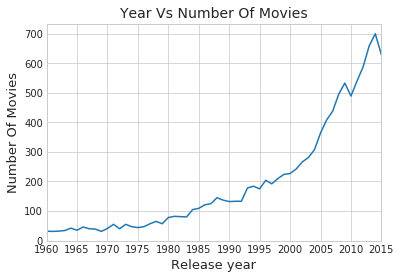

In [13]:
# lets plot our findings to see it clearly
data.plot(xticks = np.arange(1960,2016,5))
sns.set(rc={'figure.figsize':(14,5)})
plt.title("Year Vs Number Of Movies",fontsize = 14)
plt.xlabel('Release year',fontsize = 13)
plt.ylabel('Number Of Movies',fontsize = 13)
#set the style sheet
sns.set_style("whitegrid")

#### we can conclude that year 2014 year has the highest release of movies (700) followed by year 2013 (659) and year 2015 (629)

### Question 2:   what are the top 5 highest rated movies?

In [14]:
#sorting by vote_average
df_top_rated = df.sort_values(by=['vote_average'], ascending=False)
df_top_rated.head()

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
3894,125336,0.01,0,0,The Story of Film: An Odyssey,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,Mark Cousins,cinema|nouvelle vague|hindi cinema|cinema novo...,900,Documentary,0,2011-09-03,14,9.20,2011
538,224972,0.11,0,0,The Mask You Live In,0,Jennifer Siebel Newsom,feminism|sexism|young boy|gender roles|misogyny,88,Documentary,0,2015-01-01,11,8.90,2015
1200,374430,0.13,0,0,Black Mirror: White Christmas,Jon Hamm|Rafe Spall|Oona Chaplin|Natalia Tena|...,Carl Tibbetts,artificial intelligence|confession|technology|...,74,Drama|Horror|Mystery|Science Fiction|Thriller,0,2014-12-16,41,8.80,2014
2269,51299,0.22,0,0,Life Cycles,0,Derek Frankowski,sport|cycling,47,Documentary,0,2010-10-02,27,8.80,2010
6911,24970,0.21,0,0,Pink Floyd: Pulse,David Gilmour|Nick Mason|Richard Wright|Sam Br...,David Mallet,live concert,145,Music,SMV Enterprises|Columbia Music Video|EMI,2006-07-09,23,8.70,2006


### It can be noticed that the top 5 rated movies have quite small vote counts so, It is necessary to look at the distribution of vote counts.

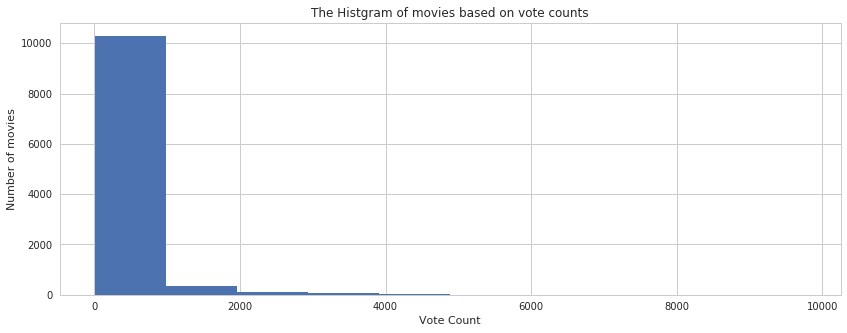

In [15]:
plt.hist(df.vote_count)
plt.title('The Histgram of movies based on vote counts')
plt.ylabel('Number of movies')
plt.xlabel('Vote Count')
#set the style sheet
sns.set_style("whitegrid")

In [16]:
#Let's derive the top 5 rated movies in 4 groups divided by the quartiles 
criteria = ['vote_count <=17', 'vote_count > 17 and vote_count<=38', 'vote_count >38 and vote_count<=146', 'vote_count>146']
def top_5_movies(df):
    quartiles = ['First', 'Second', 'Third', 'Fourth']
    data = []
    for c in criteria:
        group = df.query(c).sort_values(by=['vote_average'], ascending=False).head().reset_index().iloc[:, [1, 4, 5]]
        group.index=range(1,6)
        group.columns=['Title', 'Count', 'Rating']
        data.append(group)
    df_combined = pd.concat(
        [df.rename(columns=lambda x: x.zfill(4)) for df in data], keys=['Top 5 Movies in {} Quartiles'.format(a) for a in quartiles], axis =0)
    display(df_combined)   
top_5_movies(df)

Title       Count  \
Top 5 Movies in First Quartiles  1  125336           0   
                                 2  224972           0   
                                 3   45644           0   
                                 4   20313           0   
                                 5   55676           0   
Top 5 Movies in Second Quartiles 1   51299           0   
                                 2   24970           0   
                                 3  282848           0   
                                 4  241287           0   
                                 5   24128     4978922   
Top 5 Movies in Third Quartiles  1  374430           0   
                                 2   68450           0   
                                 3  241829           0   
                                 4  321640           0   
                                 5   15584           0   
Top 5 Movies in Fourth Quartiles 1     278    28341469   
                                 2     238   245066411   
                                 3  244786    13993093   
                                 4      13   677945399   
                                 5     155  1001921825   

                                                                               Rating  
Top 5 Movies in First Quartiles  1                      The Story of Film: An Odyssey  
                                 2                               The Mask You Live In  
                                 3    Opeth: In Live Concert At The Royal Albert Hall  
                                 4  John Mayer: Where the Light Is Live in Los Ang...  
                                 5  A Personal Journey with Martin Scorsese Throug...  
Top 5 Movies in Second Quartiles 1                                        Life Cycles  
                                 2                                  Pink Floyd: Pulse  
                                 3                 Doctor Who: The Time of the Doctor  
                                 4                                            Tropico  
                                 5                                  Stop Making Sense  
Top 5 Movies in Third Quartiles  1                      Black Mirror: White Christmas  
                                 2                                  The Art of Flight  
                                 3                     The Making of The Walking Dead  
                                 4      The Jinx: The Life and Deaths of Robert Durst  
                                 5   Dear Zachary: A Letter to a Son About His Father  
Top 5 Movies in Fourth Quartiles 1                           The Shawshank Redemption  
                                 2                                      The Godfather  
                                 3                                           Whiplash  
                                 4                                       Forrest Gump  
                                 5                                    The Dark Knight

### Question 3:  Which Genre Has The Highest Release Of Movies?

In [17]:
#first we will make a function  to split the string and return the count of each genre.
def data(x):
    #concatenate all the rows of the genrs.
    data_plot = df_tmdb[x].str.cat(sep = '|')
    data = pd.Series(data_plot.split('|'))
    #conts each of the genre and return.
    info = data.value_counts(ascending=False)
    return info

In [18]:
total_genre_movies = data('genres')
print(total_genre_movies)

Drama              4761
Comedy             3793
Thriller           2908
Action             2385
Romance            1712
Horror             1637
Adventure          1471
Crime              1355
Family             1231
Science Fiction    1230
Fantasy             916
Mystery             810
Animation           699
Documentary         520
Music               408
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
dtype: int64


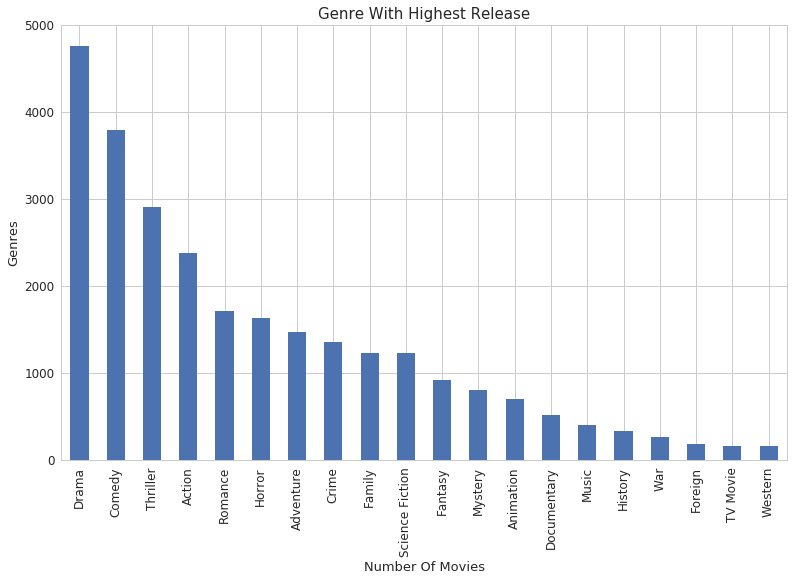

In [19]:
# now let's make it clear with some visuals
#here we will use a 'bar' plot  for 'genre vs number of movies'.
total_genre_movies.plot(kind= 'bar',figsize = (13,8),fontsize=12)
#setup the title and the labels of the plot.
plt.title("Genre With Highest Release",fontsize=15)
plt.xlabel('Number Of Movies',fontsize=13)
plt.ylabel("Genres",fontsize= 13);

#### It is obvious that drama has the highes releses and then comes comedy and thriller

### Question 4:  IS there a relationship between revenue and ratings?

(2717, 15)


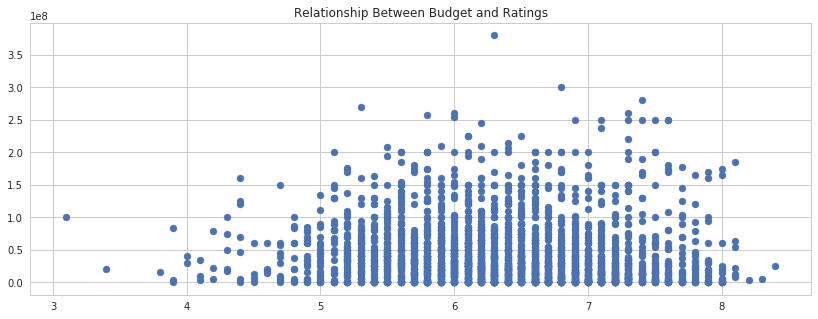

In [20]:
# let's make a scatter plot to figure it out
df1 = df.query('vote_count >= 146')
print(df1.shape)
plt.scatter(y='budget', x='vote_average',data=df1)
plt.title('Relationship Between Budget and Ratings')
plt.show()
#set the style sheet
sns.set_style("whitegrid")

#### there is no obvious relation as we can see there some low budget movies that have high ratings and vice versa so, NO relationship between Budget and Ratings

### Question 5 : What are the top 10 high revenue Movies?

In [21]:
def find_minmax(x):
    #use the function 'idmin' to find the index of lowest profit movie.
    min_index = df1[x].idxmin()
    #use the function 'idmax' to find the index of Highest profit movie.
    high_index = df1[x].idxmax()
    high = pd.DataFrame(df1.loc[high_index,:])
    low = pd.DataFrame(df1.loc[min_index,:])
    
    #print the movie with high and low profit
    print("Movie Which Has Highest "+ x + " : ",df1['original_title'][high_index])
    print("Movie Which Has Lowest "+ x + "  : ",df1['original_title'][min_index])
    return pd.concat([high,low],axis = 1)

In [22]:
find_minmax('revenue')

Movie Which Has Highest revenue :  Avatar
Movie Which Has Lowest revenue  :  Wild Card


,1386,48
id,19995,265208
popularity,9.43,2.93
budget,237000000,30000000
revenue,2781505847,0
original_title,Avatar,Wild Card
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Jason Statham|Michael Angarano|Milo Ventimigli...
director,James Cameron,Simon West
keywords,culture clash|future|space war|space colony|so...,gambling|bodyguard|remake
runtime,162,92
genres,Action|Adventure|Fantasy|Science Fiction,Thriller|Crime|Drama


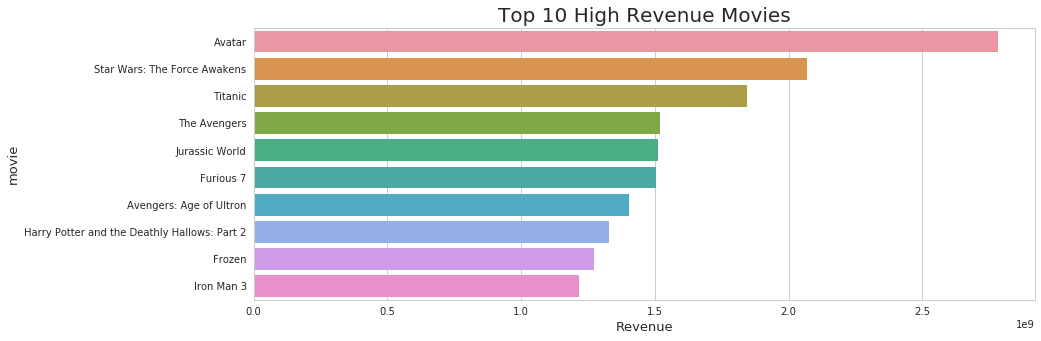

In [23]:
#top 10 movies which made highest revenue.
#sort the 'revenue' column in decending order and store it in the new dataframe.
info = pd.DataFrame(df1['revenue'].sort_values(ascending = False))
info['original_title'] = df1['original_title']
data = list(map(str,(info['original_title'])))

#extract the top 10 movies with high revenue data from the list and dataframe.
x = list(data[:10])
y = list(info['revenue'][:10])

#make the point plot and setup the title and labels.
ax= sns.barplot(x=y,y=x)
sns.set(rc={'figure.figsize':(12,5)})
ax.set_title("Top 10 High Revenue Movies",fontsize = 20)
ax.set_xlabel("Revenue",fontsize = 13)
ax.set_ylabel("movie",fontsize = 13)

sns.set_style("darkgrid")

### AS shown Avatar is the Highest revenue movie with more that 2.5 Billion

### Question 6: What duration length of movies are most likable by people?

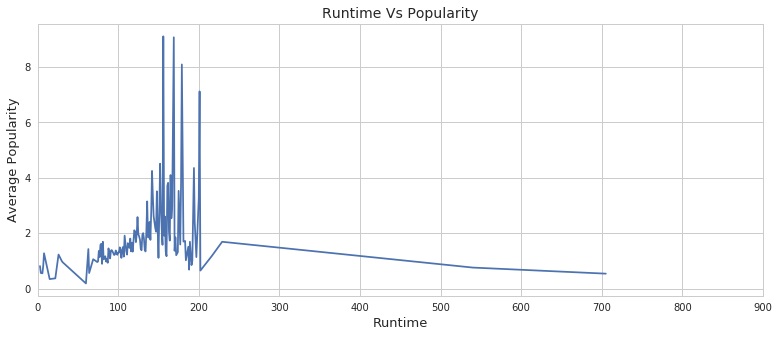

In [25]:
#make the group of the data according to their runtime and find the mean popularity related to this and plot.
df1.groupby('runtime')['popularity'].mean().plot(figsize = (13,5),xticks=np.arange(0,1000,100))

#setup the title of the figure
plt.title("Runtime Vs Popularity",fontsize = 14)
plt.xlabel('Runtime',fontsize = 13)
plt.ylabel('Average Popularity',fontsize = 13)
#setup the figure size.
sns.set(rc={'figure.figsize':(15,8)})

sns.set_style("whitegrid")

#### According to the graph most of the movies watched are between 100 minutes and 200 minutes so, we can safely say that longer films tends to have low popularity as people classify it as boring movies

<a id='conclusions'></a>
## Conclusions


### we can conclude that :
#### 1-Year 2014 year has the highest release of movies (700) followed by year 2013 (659) and year 2015 (629)
#### 2-Drama has the highes releses and then comes comedy and thriller
#### 3-NO relationship between Budget and Ratings as we can see there some low budget movies that have high ratings and vice versa
#### 4-Avatar is the Highest revenue movie with more that 2.5 Billion
#### 5- Between 100 minutes and 200 minutes is the most perferable durations for a movie 

### Limitations:




#### I wanted to Drop the rows with missing values but it will affecte the overall analysis.
#### The data may not represent the population correctly as all these data are based on people who are willing to participate in the review on the site and not all the people who actually watched the movie

In [26]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0